In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
# 1. Dataset Acquisition
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 2. Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [5]:
# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [6]:
# 3. Data Splitting (split training into train + validation)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_cat, y_val_cat = train_test_split(
    x_train, y_train_cat, test_size=0.1, random_state=42
)

In [7]:
# 4. Model Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\91637\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 5. Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
# 6. Training
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val_cat),
    verbose=2
)

Epoch 1/20
422/422 - 12s - 27ms/step - accuracy: 0.8961 - loss: 0.3609 - val_accuracy: 0.9543 - val_loss: 0.1694
Epoch 2/20
422/422 - 9s - 22ms/step - accuracy: 0.9586 - loss: 0.1378 - val_accuracy: 0.9657 - val_loss: 0.1202
Epoch 3/20
422/422 - 10s - 24ms/step - accuracy: 0.9724 - loss: 0.0934 - val_accuracy: 0.9718 - val_loss: 0.0985
Epoch 4/20
422/422 - 11s - 25ms/step - accuracy: 0.9781 - loss: 0.0717 - val_accuracy: 0.9703 - val_loss: 0.0958
Epoch 5/20
422/422 - 10s - 23ms/step - accuracy: 0.9830 - loss: 0.0557 - val_accuracy: 0.9765 - val_loss: 0.0810
Epoch 6/20
422/422 - 11s - 25ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9708 - val_loss: 0.0934
Epoch 7/20
422/422 - 7s - 16ms/step - accuracy: 0.9889 - loss: 0.0367 - val_accuracy: 0.9785 - val_loss: 0.0695
Epoch 8/20
422/422 - 10s - 24ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9802 - val_loss: 0.0730
Epoch 9/20
422/422 - 7s - 16ms/step - accuracy: 0.9931 - loss: 0.0229 - val_accuracy: 0.9793 - val

In [10]:
# 7. Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9778


In [11]:
# Predict labels for confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [12]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [13]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

Confusion Matrix:
[[ 973    1    0    2    0    0    2    1    1    0]
 [   0 1126    4    0    0    0    2    1    2    0]
 [   4    0 1013    3    3    1    2    2    4    0]
 [   0    0    3  987    0    8    0    5    5    2]
 [   1    0    3    0  967    0    4    2    1    4]
 [   3    0    0    8    1  867    6    2    3    2]
 [   6    2    2    1    2    5  938    1    1    0]
 [   1    3   10    2    1    0    0 1006    1    4]
 [   6    0    7   11    3    5    4    3  935    0]
 [   4    2    2    5   10    3    1    8    8  966]]


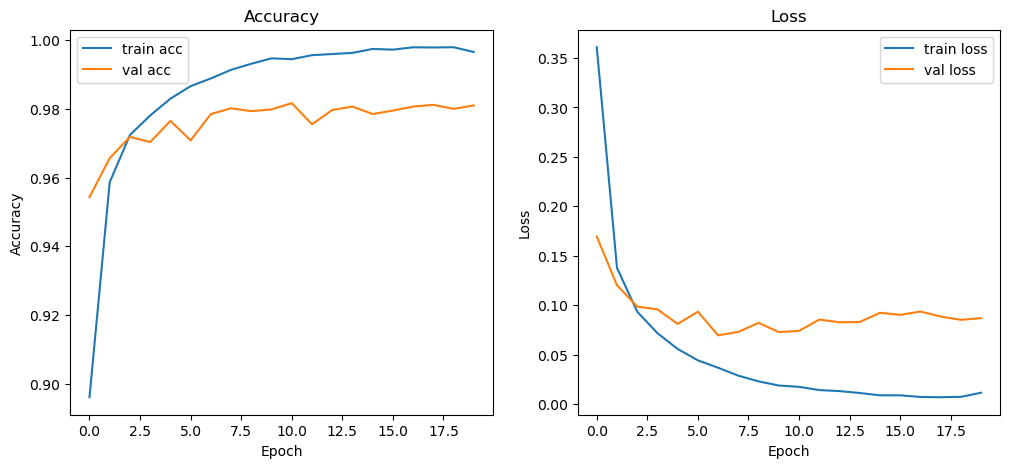

In [14]:
# 8. Visualization

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

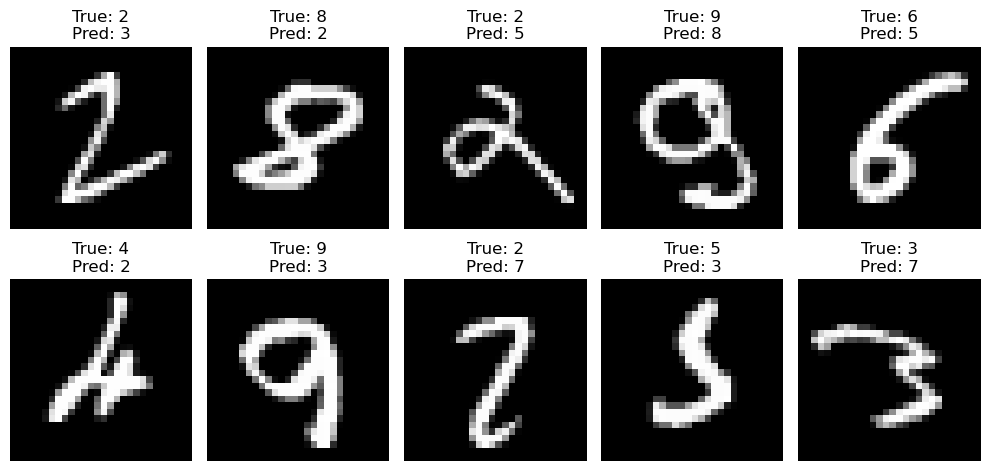

In [15]:
# Visualize some misclassified examples
misclassified_idx = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()